# Linear Regression #

Let's go through a Regression problem. The main steps we are going to take is: 

1. Load the data
2. Discover and visualize the data to gain insights
3. Prepare data for machine learning algorithms
4. Select an algorithm and train a model

The dataset we are going to use is the [California Housing Dataset](https://github.com/ageron/handson-ml/tree/master/datasets/housing) which contains data drawn from the 1990 U.S. Census. Download or use the raw [link](https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv)

The first task you are asked to perform is to build a model of housing prices in California using the California census data. This data has metrics such as the **population**, **median income**, **median housing
price**, and so on for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). We will just call them “districts” for short.


Your model should learn from this data and be able to **predict the median housing price in any district, given all the other metrics**.

## Create the workspace ##

If you are working *offline* you can create a new conda environment now with `conda create -name linear` or use any other you prefer, and install the libraries needed with `conda install matplotlib numpy pandas scipy scikit-learn`

In [1]:
#Several imports that will be needed - Check them before starting
import numpy as np
import pandas as pd
import scipy
import sklearn
import os

In [2]:
# You can also import a specific Class or method
from sklearn.metrics import accuracy_score

If you are working on Google Colab don't forget to upload the *housing.csv* file obtained from the link above using the side menu. In colab each time you need to upload your files. You can also import them from your Google Drive. Finally, you can use the url directly!

## Data Loading ##

We are loading the data using pandas. Write a small function for this, we are gonna need it later. We take a quick look into the data using pandas.

In [3]:
DATASET_PATH = "housing.csv"

housing = pd.read_csv(DATASET_PATH)
housing.head() # Top 5 rows 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
URL_PATH = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"

housing = pd.read_csv(URL_PATH)

We will print the first 5 rows:

In [5]:
housing.head() # Top 5 rows 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data discovery ##

In [6]:
housing.info() # Quick description of the data (types, columns, entries etc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20,640 instances in the dataset. Notice that the total_bedrooms attribute has only 20,433 non-null values, meaning that 207 districts are missing this feature. We will need to take care of this later. 

Also, all attributes are number except the oceant_proximity field. It is type object, since we loaded from csv, it is a text field. Take a look back at the top5 rows.

In [7]:
# Let's find all about this field
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

This reminds us of the sex feature in our previous lecture/example. But why are they different?

In [8]:
# Some further information about all the fields
housing.describe()

# STD = Standard Deviation, 25% = 25th percentile, 50% = median , 75% = 75th percentile

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Data visualization ##

### General visualization ###

Plotting histograms for each numerical value also helps us understand the data. A histogram shows the number of instances
(on the vertical axis) that have a given value range (on the horizontal axis).

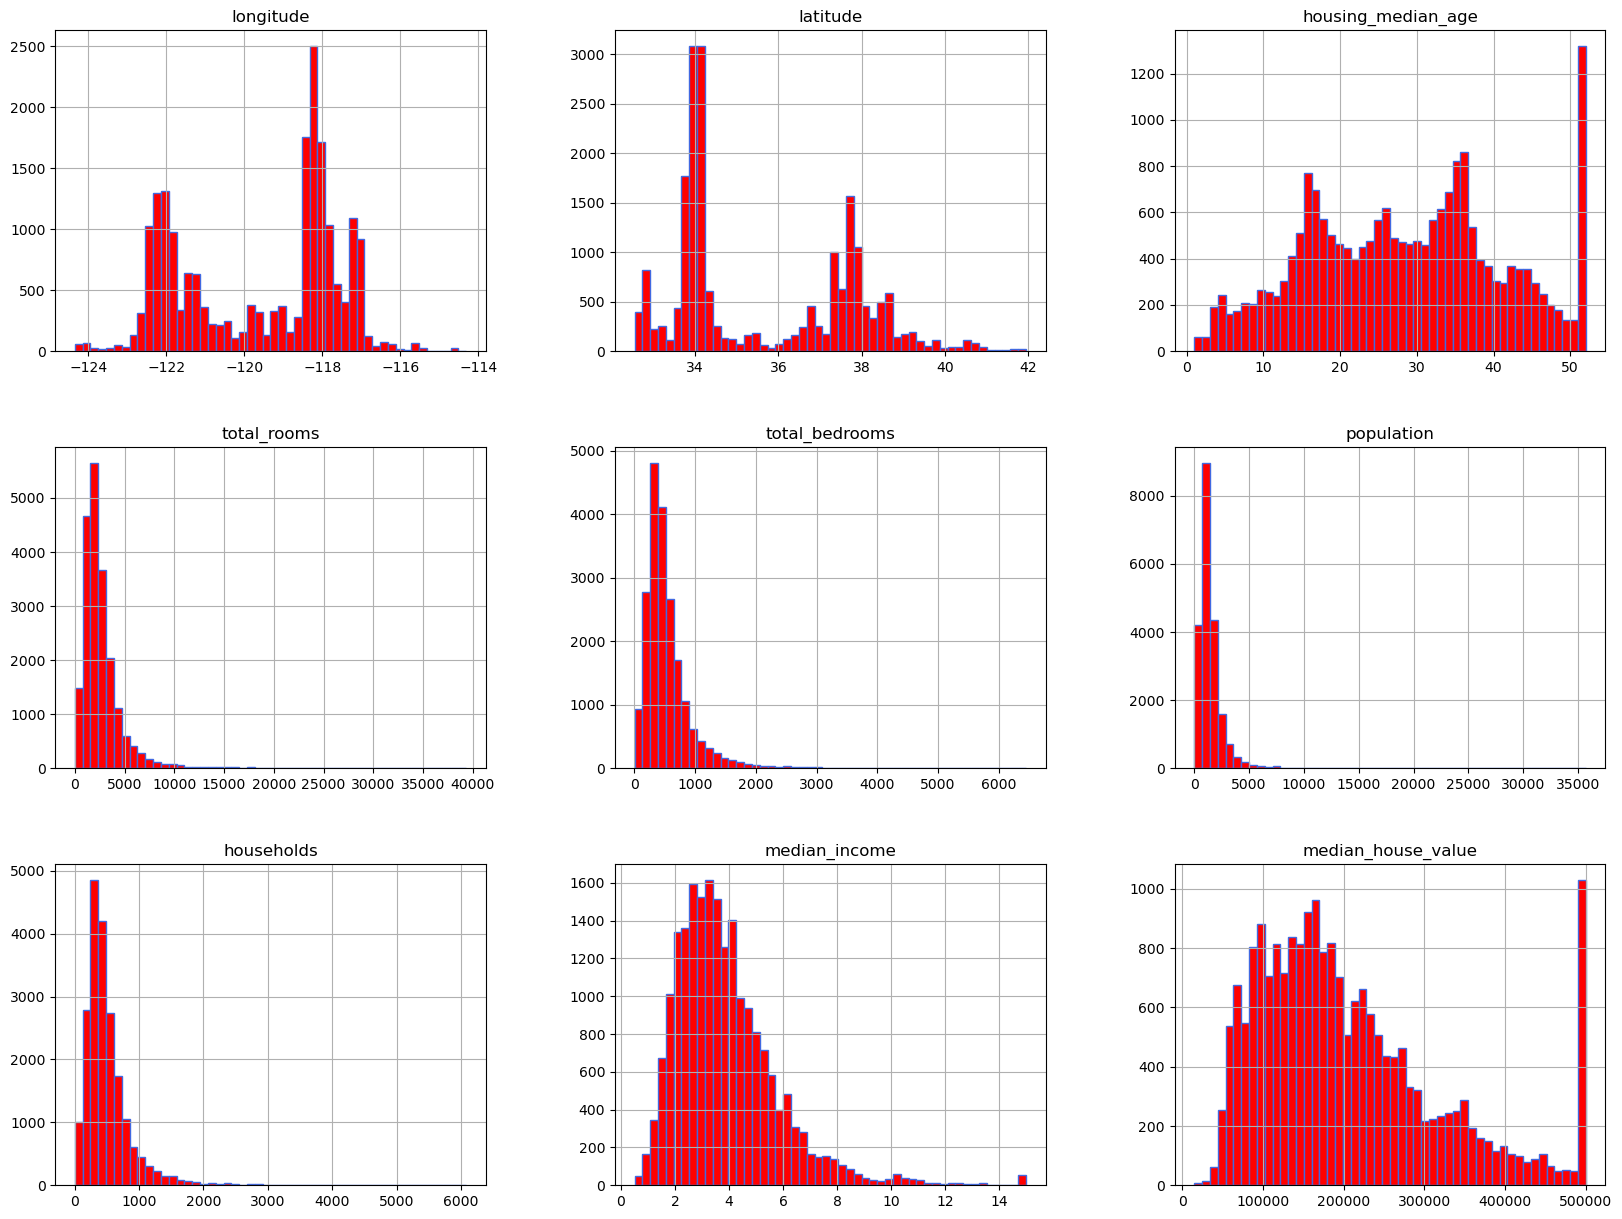

In [9]:
import matplotlib.pyplot as plt # Necessary import
housing.hist(bins=50, figsize=(20,15), color="red", ec="royalblue", lw=1) #Using like this plots for each 
#nummerical value, we choose the number of bins - the number of segments -.
plt.show()

We notice:
 * Some have been capped (median income at 15, median house age, median house value)
 * Different scales
 * Tail heavy histograms (they extend much farther to the right of the median than to the left)
 * We have a few outliers!

## Visualizing Geographical Data ##

Since there is geographical information (latitude and longitude), it is a good idea to
create a scatterplot of all districts to visualize the data. 

Here is California in the map to help us understand our data better.

<img src="http://www.orangesmile.com/common/img_city_maps/california-state-map-3.jpg " alt="california" width="400"/>

<Axes: xlabel='longitude', ylabel='latitude'>

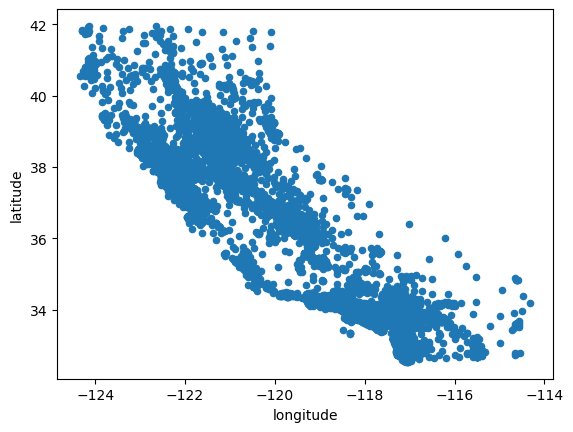

In [10]:
housing.plot(kind="scatter", x="longitude", y="latitude") # Scatter with longitute in the x axis and the latitude in th y axis. 

This looks like California all right, but other than that it is hard to see any particular pattern. Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points.

<Axes: xlabel='longitude', ylabel='latitude'>

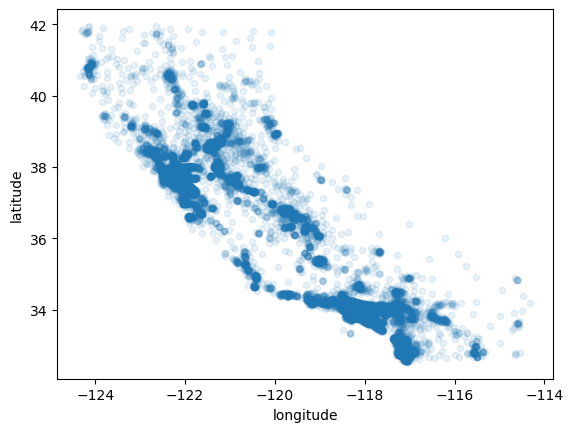

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1) # Scatter with longitute in the x axis and the latitude in th y axis. 

We can now see the high density areas (around the main cities of california).

More generally, our brains are very good at spotting patterns on pictures, but you may need to play around with visualization parameters to make the patterns stand out.

Let's include the housing prices. The radius of each circle represents the district’s population (option s), and the color represents the price (option c). We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices).


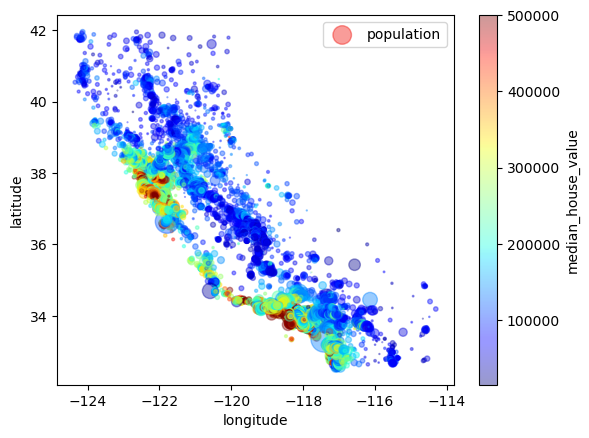

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

## Create a test set ##

### Random Sampling ###
Let's split our dataset using sklearn and a test size of 20%.



In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
# Test size must be defined. Define random state to take the same sets each time
# you run the project. 

# Prepare the data for Machine Learning Algorithms #

Instead of just doing this manually, you should write functions to do that, for several good reasons:
 
 * Reproduce the transformations on any dataset
 * Build a library of transformations functions
 * Easily try various transformations
 
 Let's work with our training set and separate the features (input values) from the labels (output values - median house value)

In [14]:
housing = train_set.drop("median_house_value", axis=1) # Creates a copy without the specified column
housing_targets = train_set["median_house_value"].copy() # Copies the column to the specified variable

## Data Cleaning ##

Most Machine Learning algorithms cannot work with missing features, so let’s create a few functions to take care of them. You noticed earlier that the total_bedrooms attribute has some missing values, so let’s fix this. You have three options:

1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.).

In cases where you have more columns with missing values you can easily use the [Simple Imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) from the scikit learn library. 


In [ ]:
#housing.dropna(subset=["total_bedrooms"]) # option 1
# housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # In this case you will need the median value also in the test set.
housing["total_bedrooms"].fillna(median) # option 3

14196     627.0
8267      787.0
17445     331.0
14265     367.0
2271      431.0
          ...  
11284     201.0
11964     570.0
5390      569.0
860       597.0
15795    1315.0
Name: total_bedrooms, Length: 16512, dtype: float64

In [ ]:
# do the same in the testset, but be aware that you should use the median from the train
housing_test = test_set.drop("median_house_value", axis=1)
# median = test_set["total bedrooms"].median()
housing_test["total_bedrooms"].fillna(median)

housing_test_targets = test_set["median_house_value"].copy()

## Handling Text and Categorical Attributes ##

The ocean_proximity fields is a text attribute. Most machine learning algorithms prefer to work with numbers, so is it better to convert these text labels to numbers.

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
print(housing_cat_encoded)
print(encoder.classes_)

[4 4 4 ... 0 0 3]
['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


Each category is mapped to a value ex. <1H OCEAN is mapped  to 0, INLDAND is mapped to 1 etc.

One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. Obviously this is not the case (for example, categories 0 and 4 are more similar than categories 0 and 1).

To fix this we create one binary category for each attribute. One attribute is equal to 1 when the category matched the ocean proximity of the district and 0 to all other attributes.


Scikit-Learn provides a [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) encoder to convert integer categorical values into one-hot vectors. Let’s encode the categories as one-hot vectors. Note that fit_transform() expects a 2D array, but housing_cat_encoded is a 1D array, so we need to reshape it.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

Notice that the output is a SciPy sparse matrix, instead of a NumPy array. This is very useful when you have categorical attributes with thousands of categories. After one-hot encoding we get a matrix with thousands of columns, and the matrix is full of zeros except for one 1 per row. Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the nonzero elements. You can use it mostly like a normal 2D array,19 but if you really want to convert it to a (dense) NumPy array, just call the toarray() method.

In [ ]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

You can combine both of the above using the [Label Binarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html). 


## Feature Scaling ##

For normalization you can use the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) and for Standardization you can use the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

## Pipelines (Optional)##

You can combine all the transformations into one [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). The Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps. All but the last estimator must be transformers (i.e., they must have a fit_transform() method). The names can be anything you like.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

housing_num = housing.drop("ocean_proximity", axis=1) # Get only the numerical values


# Set up the pipeline
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('normalization', MinMaxScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

pd.DataFrame(housing_num_tr).head()

,0,1,2,3,4,5,6,7
0,0.729084,0.017021,0.627451,0.079455,0.097145,0.064380,0.102286,0.190322
1,0.616534,0.129787,0.941176,0.085966,0.121974,0.036744,0.124157,0.228452
2,0.385458,0.224468,0.058824,0.048197,0.051210,0.025561,0.055090,0.252162
3,0.721116,0.014894,0.686275,0.036090,0.056797,0.039659,0.058214,0.099488
4,0.453187,0.450000,0.823529,0.060532,0.066729,0.024412,0.062325,0.210638


In [ ]:
# do the same for the test data. There is only on thing different here.
housing_num_test = ...
housing_num_test_tr = ...

Let's join the numerical values with the categorical. We do that with the [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer

# Specify the transformer and the columns to affect. You also use pipelines as transformer.
full_pipeline = ColumnTransformer([
    ("num_pipeline", num_pipeline, housing.columns[:-1]),
    ('label_binarizer', OneHotEncoder(),[housing.columns[-1]])
])

housing_prepared = full_pipeline.fit_transform(housing)
pd.DataFrame(housing_prepared).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.729084,0.017021,0.627451,0.079455,0.097145,0.064380,0.102286,0.190322,0.0,0.0,0.0,0.0,1.0
1,0.616534,0.129787,0.941176,0.085966,0.121974,0.036744,0.124157,0.228452,0.0,0.0,0.0,0.0,1.0
2,0.385458,0.224468,0.058824,0.048197,0.051210,0.025561,0.055090,0.252162,0.0,0.0,0.0,0.0,1.0
3,0.721116,0.014894,0.686275,0.036090,0.056797,0.039659,0.058214,0.099488,0.0,0.0,0.0,0.0,1.0
4,0.453187,0.450000,0.823529,0.060532,0.066729,0.024412,0.062325,0.210638,0.0,1.0,0.0,0.0,0.0


In [ ]:
#do the same for the test set. There is only on thing different here.
housing_test_prepared = ...
pd.DataFrame(housing_test_prepared).head()

## Select and Train a Model  ##

Following all these steps made the process of training a model and evaluating it much simpler. In this sections will train a regression using the sklearn method of LinearRegression and using Normal Equation



### Linear Regression (sklearn) ###

We train a linear regression model using the scikit learn library.

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_targets)

LinearRegression()

In [ ]:
# Let's try out on few instances from the training set
some_data = housing.iloc[:5] # Choosing some data
some_targets = housing_targets.iloc[:5] # Don't forget to also get the targets
some_data_prepared = full_pipeline.transform(some_data) # Transform thoses data with the pipeline
print("Predictions:\t", [round(i,1) for i in lin_reg.predict(some_data_prepared)])
print("Real Values:\t", list(some_targets))

Predictions:	 [188628.1, 290379.9, 250985.5, 146878.1, 165789.4]
Real Values:	 [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]


Predictions doesn't seem very accurate. Let's measure this regression model’s Root Mean Square Error (RMSE)

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared) # Taking the predictions on the training set
lin_mse = mean_squared_error(housing_targets, housing_predictions) # Computing mean squared error
lin_rmse = np.sqrt(lin_mse) # Taking the root
lin_rmse

68433.93736666224

In [ ]:
# Do the same for the test set
housing_predictions = ...
lin_mse = mean_squared_error(... , ...) # Computing mean squared error
lin_rmse = np.sqrt(lin_mse) # Taking the root
lin_rmse

### Linear Regression (Normal Equation) ###

To find the value of θ that minimizes the cost function, there is a closed-form solution
—in other words, a mathematical equation that gives the result directly. This is called
the Normal Equation.

$ θ=(X^TX)^{−1}X^{T}y $

$X^T$ -> Ανάστροφος του Χ

$X^{−1}$ -> Αντίστροφος του Χ


#### A simple example ####

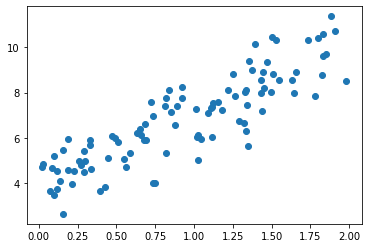

In [ ]:
# Creating random X and y
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(x=X,y=y) # Let's see our data

In [ ]:
# We will use the pinv() function from NumPy’s Linear Algebra module (np.linalg) 7
# to compute the inverse of a matrix, and the dot() method for matrix multiplication

X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.95925837],
       [3.05245693]])

[[ 3.95925837]
 [10.06417223]]


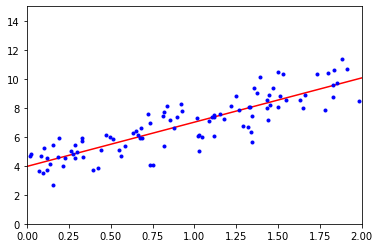

In [ ]:
# Prediction
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print(y_predict)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

#### Back to our example ####

In [ ]:
X = housing_prepared
y = housing_targets

X_b = np.c_[np.ones((X.shape[0], 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print([round(i,1) for i in theta_best])
print(lin_reg.intercept_)
print([round(i,1) for i in lin_reg.coef_])


[227152.8, -269456.3, -239402.5, 56211.4, -236753.6, 662374.9, -1361971.1, 293425.0, 572380.5, 26504.0, -13282.7, 162629.0, 21367.3, 29935.1]
272583.3414802102
[-269456.3, -239402.5, 56211.4, -236753.6, 662374.9, -1361971.1, 293425.0, 572380.5, -18926.6, -58713.2, 117198.5, -24063.2, -15495.4]


In [ ]:
# Let's try out on few instances from the training set
some_data = housing.iloc[:5] # Choosing some data
some_targets = housing_targets.iloc[:5] # Don't forget to also get the targets
some_data_prepared = full_pipeline.transform(some_data) # Transform thoses data with the pipeline
print("Predictions Regression:\t\t", [round(i,1) for i in lin_reg.predict(some_data_prepared)])


X_new_b = np.c_[np.ones((some_data_prepared.shape[0], 1)), some_data_prepared] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print("Predictions Normal Equation:\t", [round(i,1) for i in y_predict])


# print("Targets:\t", list(some_targets))

Predictions Regression:		 [188628.1, 290379.9, 250985.5, 146878.1, 165789.4]
Predictions Normal Equation:	 [188628.1, 290379.9, 250985.5, 146878.1, 165789.4]


In [ ]:
from sklearn.metrics import mean_squared_error
#Measuring the performance with RMSE using Normal Equation
housing_predictions = X_b.dot(theta_best) # Taking the predictions on the training set
lin_mse = mean_squared_error(housing_targets, housing_predictions) # Computing mean squared error
lin_rmse = np.sqrt(lin_mse) # Taking the root
lin_rmse

68433.93736666224

In the next lecture, we will introduce the algorithms "SGD: stochastic gradient descent" and "Logistic Regression"
## 2nd hour of the next colab:
- We will discuss your simple assignment
- We will discuss any questions
- We will revisit any obscure parts
- We will also try SGD on the same dataset
- Then, we will continue with Logistic Regreassion on another dataset
- We will, also talk for your assignment

## Questions

- What can we do to increase the performance of the model?
- Try different preprocessing!
- Can we raise the performance of the model?
